## Final Project Submission

Please fill out:
* Student name: Hilary Simiyu
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


# LOAN APPROVAL ANALYSIS FOR THE BANK OF INDIA

## Business Understanding

### Overview
The loan approval project aims to develop a predictive model that can reliably assess an applicant's chances of getting a loan based on their financial and personal characteristics. This approach uses machine learning algorithms and historical data to improve and automate decision-making. By analyzing patterns and trends within the data, the model can provide reliable recommendations, thus aiding the Bank of India, the stakeholder of this project, in reducing the time and resources spent on manual evaluations and improving the consistency of loan approval decisions.

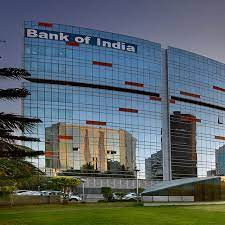

#### Challenges
The major challenge in developing a loan approval model is the high reliance on high quality data whereby incomplete and inaccuarate data can lead to unrealiable predictions.Additionally, ensuring the model complies with regulatory requirements and ethical considerations, such as preventing discriminatory biases, presents a significant challenge. Also ensuring a balance between the model's complexity and interpretability ia a challange as we have to ensure the stakeholders are able to understand the model but also maintain a bit of complexity for better results.

#### Proposed Solution
The proposed Solution is to create a model with a target accuaracy score of 80% by training it on comprehensive data based on previous applicants such as the employment status and income level.To address the data isues , extensive data preprocessing will be employed with regular bias detection along the way to ensure the model remains fair.The model will be tailored to meet specific business needs and regulatory frameworks for the Bank of India as the key stakeholder

In conclusion, the loan approval project aims to significantly enhance the efficiency and accuracy of the loan approval process through advanced machine learning techniques. While challenges such as data quality, the proposed solution focuses on achieving a balance between performance and interpretability. With an accuracy target of 80%, the model is expected to provide reliable predictions that can streamline bank operations, reduce approval times, and maintain fair lending practices. By addressing these challenges and implementing a robust evaluation framework, the project aspires to deliver a valuable tool for banks, including the Bank of India, ensuring its alignment with their operational goals and regulatory requirements.

### Problem Statement
With adavancement in technology and increased competition, The Bank of India wishes to  enhance its loan approval process by developing a predictive model that accurately determines the likelihood of loan approval for applicants.By moving away from manual evaluations to more data-driven solutions to enure faster and reliable decisions.This model will rely on previous customers data and identify patterns from there and predict approval outcomes.The key challenge is to develop a model that not only achieves high accuracy but also adheres to regulatory standards and maintains ethical lending practices.


### Objectives
 * To
 * To
 * To